# Random numer generator

Let's start with $\pi$ as a random generator

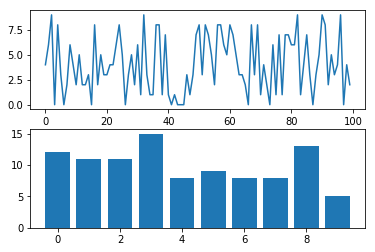

In [1]:
# Importamos los módulos necesarios

import numpy as np
import matplotlib.pyplot as plt

import datetime

# Store the first 1000 digits of pi
pi = (
    "14159265358979323846264338327950288419716939937510"
    "58209749445923078164062862089986280348253421170679"
    "82148086513282306647093844609550582231725359408128"
    "48111745028410270193852110555964462294895493038196"
    "44288109756659334461284756482337867831652712019091"
    "45648566923460348610454326648213393607260249141273"
    "72458700660631558817488152092096282925409171536436"
    "78925903600113305305488204665213841469519415116094"
    "33057270365759591953092186117381932611793105118548"
    "07446237996274956735188575272489122793818301194912"
    "98336733624406566430860213949463952247371907021798"
    "60943702770539217176293176752384674818467669405132"
    "00056812714526356082778577134275778960917363717872"
    "14684409012249534301465495853710507922796892589235"
    "42019956112129021960864034418159813629774771309960"
    "51870721134999999837297804995105973173281609631859"
    "50244594553469083026425223082533446850352619311881"
    "71010003137838752886587533208381420617177669147303"
    "59825349042875546873115956286388235378759375195778"
    "18577805321712268066130019278766111959092164201989"
)

# Use the first 100 digits for the random number sequence
# pi = pi[:100]


def randomGenerator(n, semilla):
    """
    Input:
      n: length of the random sequence
      semilla: seed for the sequence
    Output:
      seq: list with the random sequence
    """
    seq = []  # Starts with an empty list
    for i in range(n):
        # Concatenates each new element of the random sequence
        seq = seq + [int(pi[semilla])]
        semilla += 1
        # If the index is larger than the pi length restart to 0
        if semilla > len(pi) - 1:
            semilla = 0

    return seq


def freqCount(seq):
    """
    Input: random sequence (seq)
    Output: frequency count (freq)
    """
    freq = [0 for i in range(max(seq) + 1)]
    for i in seq:
        freq[i] += 1
    
    return freq

n = 100  # Length of the random sequence
# semilla = 68  # seed, any number between 0 and length of pi
semilla = datetime.datetime.now().microsecond
semilla = str(semilla)[-3:]
semilla = int(semilla)

seq = randomGenerator(n, semilla)  # Calls randomGenerator

freq = freqCount(seq)

plt.figure(1)
plt.subplot(211)
plt.plot(seq)  # pyplot plot function
plt.subplot(212)
plt.bar(range(max(seq) + 1), freq)  # pyplot bar function
plt.show()

### Middle square generator

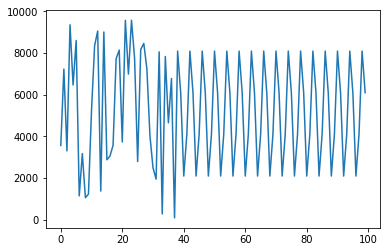

In [2]:
def mid_square_generator(seed, n=1):
    """
    seed: seed of random generator
    n: random sequence lenght 
    """
    sequence = [seed]  # Start sequence with seed
    for i in range(n-1):  # Generate n-1 values, first value is seed
        square = str(sequence[-1]**2).rjust(4,'0')  # Square the number and transform to string
        square_middle = int(len(square) / 2)  # Get the middle point of the string
        # slice the middle of the string and transform to integer
        sequence += [int(square[square_middle-2:square_middle+2])]
        
    return sequence
        

plt.plot(mid_square_generator(3567, 100))
plt.show()

### Linear congruential generator

- Try to implement a linear congruential generator (LCG): https://drive.google.com/file/d/0B-dmEvN59Z2Zd3REcHJEdldicTQ/view

- LCG: $Xn = (aX_{n−1} + c) \text{ mod } m$
    - a: multiplier
    - c: increment
    - m: modulus
    - {X_0}: seed

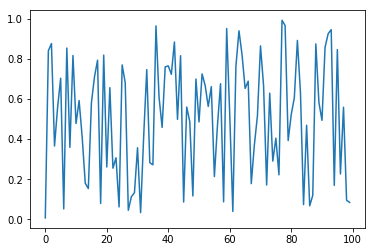

In [3]:
def lcg(seed, increment, multiplier, modulus, size):
    """
    Linear congruential generator
    size: length of the sequence
    """
    sequence = [seed]
    for i in range(size-1):
        sequence += [(sequence[-1]*multiplier + increment) % modulus]
        
    return np.array(sequence)/modulus

plt.plot(lcg(7,101,401,1024,100))
plt.show()

### Let us measure the quality of the generators

** Uniformity measures:**

- Chi-square goodness of fit test:

Let us consider a random experiment where $\Omega$ is the corresponding sample space. We have a partition of the sample space $A_1, A_2, \dots, A_k$, where
$$
\Omega = A_1 \cup A_2 \cup \dots \cup A_k, 
\text{ with } A_i \cap A_j=\emptyset, \text{ for } i=j
$$

If the experiment is repeated $n$ independent times, and we let $p_i = P(A_i)$ and $o_i$ = the number of times the experiment results in $A_i,\ i = 1, \dots, k$, then we can define the chi-square statistic in terms of the number of observed outcomes and the number of expected outcomes $e_i=n*p_i$ for each of the $k$ categories in as follows:

$$
Y_{(k-1)} = \sum_{i=1}^k \frac{(o_i - e_i)^2}{e_i}.
$$ 

**Test:**

$H_0:\ p_1 = p_1^*,\ p_1 = p_1^*, \dots, p_n = p_k^*$,

$H_1:$ if for any $i,\ p_i \neq p_i^*$.

** Decision **

Reject $H_0$ if $Y_{(k-1)} > \chi^2_{(k-1),1-\alpha}$. Usually $\alpha=0.05$.

### Example:

Let's get back to our $\pi$ random generator (see __[slide 17](https://drive.google.com/file/d/0B-dmEvN59Z2Zd3REcHJEdldicTQ/view)__):

In [4]:
random_sequence = randomGenerator(100,68)

freq_oi = np.array(freqCount(random_sequence))
print("Observed frequencies:", freq_oi)

Observed frequencies: [13 11 14  7 11  8  9  6 15  6]


Let us calculate the expected frequencies:

$$e_i = n\times p(A_i) = n\times p(X=i),\ i \in {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}.$$

We want to test that the $\pi$ $\texttt{randomGenerator}$ follows a discrete uniform distribution $X \sim U\{a,b\}$ with $pmf=1/m$, $m=b-a+1$.

That is,
$$
p(A_i) = 1/m = 1/10,\ \forall i.
$$

For $n=100$ random numbers in the sequnces we have:

$$e_i = n\times p(A_i) = 100 * 1/10 = 10,\ \forall i.$$

In [5]:
freq_ei = np.ones(10)*10
print("Expected frequencies:", freq_ei)

Expected frequencies: [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]


In [6]:
test = sum((freq_oi - freq_ei)**2 / freq_ei)
print("Test-statistics:", test)

from scipy.stats import chi2

deg = 10-1  # degrees of freedom

# Inverse of the CDF (quantile function)
critical = chi2.ppf(0.95, deg)

if test > critical:
    print("Reject null hypothesis", test, "is larger that", critical)
else:
    print("Do not reject null hypothesis", test, "is smaller that", critical)

Test-statistics: 9.8
Do not reject null hypothesis 9.8 is smaller that 16.9189776046


### Let's take a look to the test decision graphically

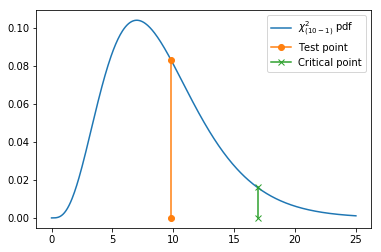

In [7]:
x = np.linspace(0,25,400)  # 400 values between 0 and 20 equally spaced
fx = chi2.pdf(x, deg)

plt.plot(x, fx)
plt.plot([test, test], [0, chi2.pdf(test, deg)],'-o')
plt.plot([critical, critical], [0, chi2.pdf(critical, deg)],'-x')
plt.legend(["$\chi^2_{(10-1)}$ pdf", "Test point", "Critical point"])
plt.show()

The rejection region is to the right of green line. The orange point is not in the rejection area. Thus, there is not enough evidence against the null hypothesis.

Let's get the p-value of the test:

In [8]:
p_value = 1 - chi2.cdf(test, deg)
print("The p-value:", p_value, "is larger than alpha = 0.05. What's the conclusion?")

The p-value: 0.366917799113 is larger than alpha = 0.05. What's the conclusion?


Python implements the $\chi^2$ test:

In [9]:
from scipy.stats import chisquare

# We need to pass the observed and expected frequencies
chisquare(freq_oi, f_exp=freq_ei)

Power_divergenceResult(statistic=9.7999999999999989, pvalue=0.36691779911275274)

** Source: **

- https://onlinecourses.science.psu.edu/stat414/node/257

### 2D Visual Check of Overlapping Pairs

- An easy way to visualize the dependence between pairs of consecutive samples is a scatter plot of the points ($X_i, X_{i + 1}$) for $i = 1, 2, ..., N − 1$. N is the sequence length.

- 2D Visual Check for LCG(401,101,1024,7,1000), LCG(a,c,m,seed,n). LCG: $Xn = (aX_{n−1} + c) \text{ mod } m$.


In [10]:
def pairs(seq):
    """
    Returns Xi, Xi+1 point coordinates from sequence seq
    """
    N = len(seq)
    x_coord, y_coord = [], []
    for i in range(N - 1):
        x_coord += [seq[i]]
        y_coord += [seq[i+1]]
        
    return x_coord, y_coord

- Let's generate a sequence of size 500. Note the holes in the space $U\sim (0,1)$. This is due to that we are not completed a cycle of the generator.

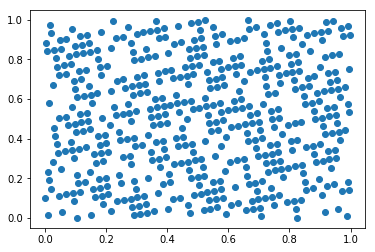

In [11]:
seq = lcg(seed=7, increment=101, multiplier=401, modulus=1024, size=500)

x, y = pairs(seq)
plt.plot(x, y, 'o')
plt.show()

- With a sequence size of 1024, the cycle of the generator ther are no holes in the space.

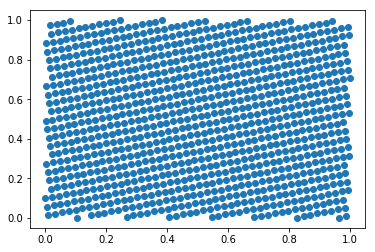

In [12]:
# Sequence with 1024 values, note the holes in the grid
seq = lcg(seed=7, increment=101, multiplier=401, modulus=1024, size=1024)

x, y = pairs(seq)
plt.plot(x, y, 'o')
plt.show()

- Let's test two small LCG generators:

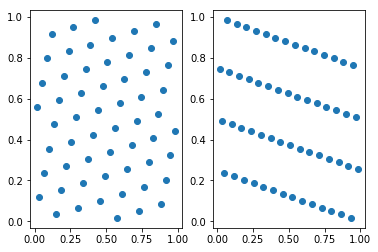

In [13]:
# mutliplier is 33
seq = lcg(seed=10, increment=0, multiplier=33, modulus=59, size=59)
x1, y1 = pairs(seq)

# mutliplier is 44
seq = lcg(seed=10, increment=0, multiplier=44, modulus=59, size=59)
x2, y2 = pairs(seq)

plt.figure(1)
plt.subplot(121)
plt.plot(x1, y1, 'o')
plt.subplot(122)
plt.plot(x2, y2, 'o')
plt.show()

The lattice points in $k$ dimensions lie within sets of parallel $k−1$ dimensional planes. Lattices where those planes are far apart miss much of the space, and so are poor approximations to the desired uniform distribution. The Generator at right is worse than the generator at left.